# 0.4 回归分析与K-means
## 0.4.1 回归分析
### 一元/多元线性回归的求解
假设给定一组特征$x_1, x_2, \dots, x_p$，他们是一个样本的$p$个特征。该样本对应的真实目标值为$y$，而根据回归方程预测出的目标值为$\hat{y}$，
$$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p$$

如果我们共有$n$个样本，第$i$个样本的特征为$x_{i1}, x_{i2}, \dots, x_{ip}$，目标值为$y_i$，则模型在第$i$个样本上的误差为
$$e_i = (y_i - \hat{y}_i) = (y_i - \beta_0 - \beta_1 x_{i1} - \beta_2 x_{i2} - \dots - \beta_p x_{ip})$$

然后我们可以求出在总体$n$个样本上的残差平方和RSS：
$$RSS = \sum_{i=1}^n e_i^2 = \sum_{i=1}^n (y_i - \hat{y}_i)^2 = \sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_{i1} - \beta_2 x_{i2} - \dots - \beta_p x_{ip})^2$$

因此，线性回归的本质就是利用$n$个样本
$$(x_{11},x_{12},\dots,x_{1p},y_1),\;(x_{21},x_{22},\dots,x_{2p},y_2),\;\dots,\;(x_{n1},x_{n2},\dots,x_{np},y_n)$$
寻找 RSS 的**最小值**。其中的优化参数为$\beta_0,\beta_1,\beta_2,\dots,\beta_p$

线性回归的本质是一个**最优化问题**。

这种最优化问题通常有两种解法：
1. 将 RSS 写成 X 与 Y 的矩阵形式，利用矩阵求导求得精确解。
2. 利用梯度下降等算法来求近似解。

### 多项式回归

线性回归只能拟合直线或平面，对于变量之间存在的**非线性关系**，需要考虑利用多项式回归模拟非线性关系。多项式回归模型的定义如下所示：
$$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \dots + \beta_p x^p$$

这是一个$p$次多项式，在实际应用中，$p$的次数一般不会取的很高，这是为了**避免模型的过拟合**。

在求解时，通常会把上式中的$p$个$x$项看作$p$个特征，然后采用多元线性回归的解法求解。
1.  **本质**：多项式回归是线性回归的扩展，通过引入自变量的高次项，将非线性问题转化为多元线性回归问题来求解。
2.  **过拟合风险**：当多项式次数$p$过高时，模型会过度学习训练数据中的噪声，导致在新数据上的泛化能力变差。
3.  **求解思路**：把$x, x^2, \dots, x^p$看作新的特征，就可以直接复用多元线性回归的求解方法（如最小二乘法、梯度下降）。

## 0.4.2 聚类算法
### 聚类分析是一种无监督学习
### 核心定义
聚类问题可以抽象为数学中的**集合划分问题**：给定一个样本集 $X=\{x_1,x_2,\dots,x_n\}$，将其分成 $m$ 个子集 $C_1,C_2,\dots,C_m$，这些子集又称为**簇**。
聚类的严格数学条件，要满足以下3个条件：
1.  **非空性**：$C_i \neq \varnothing,\; i=1,2,\dots,m$
    每个簇都必须包含至少一个样本，不能是空集。
2.  **完备性**：$C_1 \cup C_2 \cup \dots \cup C_m = X$
    所有样本都必须被划分到某个簇中，没有遗漏。
3.  **互斥性**：$C_i \cap C_j = \varnothing\; (\forall i \neq j,\; i,j=1,2,\dots,m)$
    每个样本只能属于一个簇，不能同时出现在多个簇中。
### 聚类算法的分类
聚类算法大体上可以分为以下几类：
- **基于划分的方法**：K-Means、K-Medoids、CLARA、CLARANS等算法
- **基于层次的方法**：单链接、全链接、平均链接、CURE、ROCK、BIRCH等算法
- **基于密度的方法**：DBSCAN、OPTICS、DENCLUE等算法
- **基于网格的方法**：STING、WaveCluster、CLIQUE等算法
- **基于模型的方法**：COBWEB、SOM等算法

要获得优质的聚类效果，需要根据**数据类型、聚类目的和应用场景**，在众多聚类算法中选择最合适的算法进行分析与分类。

## 0.4.3线性回归实例

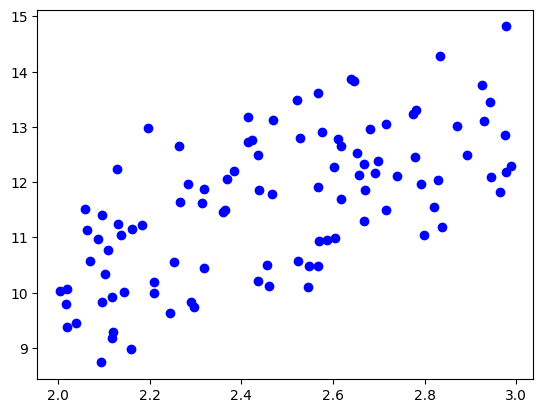

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(0)
x = 2 + np.random.rand(100,1)
y = 4 + 3*x + np.random.randn(100,1)

plt.scatter(x, y, color="blue")
plt.show()

Mean squared error: 88.2223


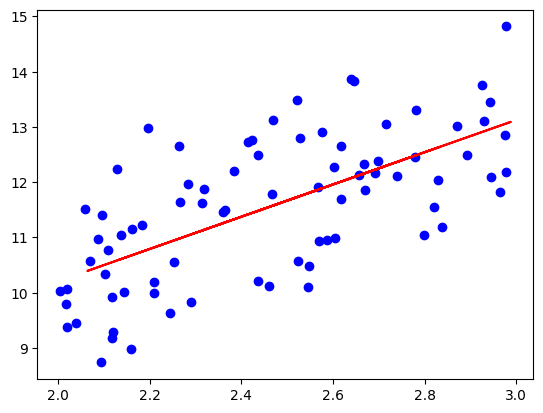

In [2]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=1)

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)
mse = mean_squared_error(x_test,y_test)
print("Mean squared error: {:.4f}".format(mse))

plt.scatter(x_train, y_train, color="blue")
plt.plot(x_test, y_pred, color="red")
plt.show()